In [128]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
movies = pd.read_csv("movies.csv")
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
movies['title'].value_counts()

title
Emma (1996)                               2
War of the Worlds (2005)                  2
Confessions of a Dangerous Mind (2002)    2
Eros (2004)                               2
Saturn 3 (1980)                           2
                                         ..
Lost and Delirious (2001)                 1
Rape Me (Baise-moi) (2000)                1
Alice (1990)                              1
Another Woman (1988)                      1
Andrew Dice Clay: Dice Rules (1991)       1
Name: count, Length: 9737, dtype: int64

# Feature Engineering (extracting `years`)

In [4]:
# Function to extract years
def extract_years(movie):
    """
    This function will extract the release year of the movie 
    by takes 4 digits of numerals in parentheses at the end 
    of the title. The output will be the release year of the 
    movie in integar format. If the title does not have the 
    release date, the output will be 0 as a missing value.

    movie: string
    """
    if movie[-5:-1].isdigit():
        year = (int(movie[-5:-1]))
    else:
        year = 0
    return year

In [5]:
movies['year'] = movies['title'].apply(extract_years)

movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [6]:
ratings = pd.read_csv("ratings.csv")

ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
movies = pd.merge(movies, ratings, on='movieId', how='inner')

movies.head()

,movieId,title,genres,year,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,17,4.5,1305696483


In [8]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100836 non-null  int64  
 1   title      100836 non-null  object 
 2   genres     100836 non-null  object 
 3   year       100836 non-null  int64  
 4   userId     100836 non-null  int64  
 5   rating     100836 non-null  float64
 6   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 5.4+ MB


# Feature Engineering (separate `genres`)

In [9]:
movies['genres'] = movies['genres'].str.split("|", n=10)
movies.head()

,movieId,title,genres,year,userId,rating,timestamp
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1,4.0,964982703
1,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,5,4.0,847434962
2,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,7,4.5,1106635946
3,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,15,2.5,1510577970
4,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,17,4.5,1305696483


In [10]:
genre_names = ['Action', 'Adventure', 'Animation', "Children", 'Comedy', 'Crime', 'Documentary',
                'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
                'Thriller', 'War', 'Western', '(no genres listed)']
genre_df = pd.DataFrame(columns=genre_names, index=range(0, len(movies))).fillna(0)
genre_df.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,(no genres listed)
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
genre_df.shape

(100836, 20)

In [12]:
movies = movies.join(genre_df)
movies.columns

Index(['movieId', 'title', 'genres', 'year', 'userId', 'rating', 'timestamp',
       'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western',
       '(no genres listed)'],
      dtype='object')

In [13]:
movies.head()

,movieId,title,genres,year,userId,rating,timestamp,Action,Adventure,Animation,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,(no genres listed)
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1,4.0,964982703,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,5,4.0,847434962,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,7,4.5,1106635946,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,15,2.5,1510577970,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,17,4.5,1305696483,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
def assign_genres(idx):
    
    for genre in movies["genres"][idx]:
        movies[genre][idx] = int(1)

In [ ]:
for idx in range(len(movies)):
    assign_genres(idx)

movies.tail()

In [17]:
movies['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [110]:
movies.loc[movies['rating'] == 0]

,movieId,title,genres,year,userId,rating,timestamp,Action,Adventure,Animation,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,(no genres listed)


# Data Exploration (`genres`)

In [167]:
genre_count = {}
for genre in genre_names:
    genre_count[genre] = len(movies.loc[movies[genre] == 1])



{'Action': 30635,
 'Adventure': 24161,
 'Animation': 6988,
 'Children': 9208,
 'Comedy': 39053,
 'Crime': 16681,
 'Documentary': 1219,
 'Drama': 41928,
 'Fantasy': 11834,
 'Film-Noir': 870,
 'Horror': 7291,
 'IMAX': 4145,
 'Musical': 4138,
 'Mystery': 7674,
 'Romance': 18124,
 'Sci-Fi': 17243,
 'Thriller': 26452,
 'War': 4859,
 'Western': 1930,
 '(no genres listed)': 47}

In [181]:
# 5 most reviewed movies
sorted(genre_count.items(), key=lambda x: x[1], reverse=True)[:6]

[('Drama', 41928),
 ('Comedy', 39053),
 ('Action', 30635),
 ('Thriller', 26452),
 ('Adventure', 24161),
 ('Romance', 18124)]

(array([ 231.,  458.,  298., 1285., 1046., 3766., 2372., 4903., 1381.,
        2384.]),
 array([0.5 , 0.95, 1.4 , 1.85, 2.3 , 2.75, 3.2 , 3.65, 4.1 , 4.55, 5.  ]),
 <BarContainer object of 10 artists>)

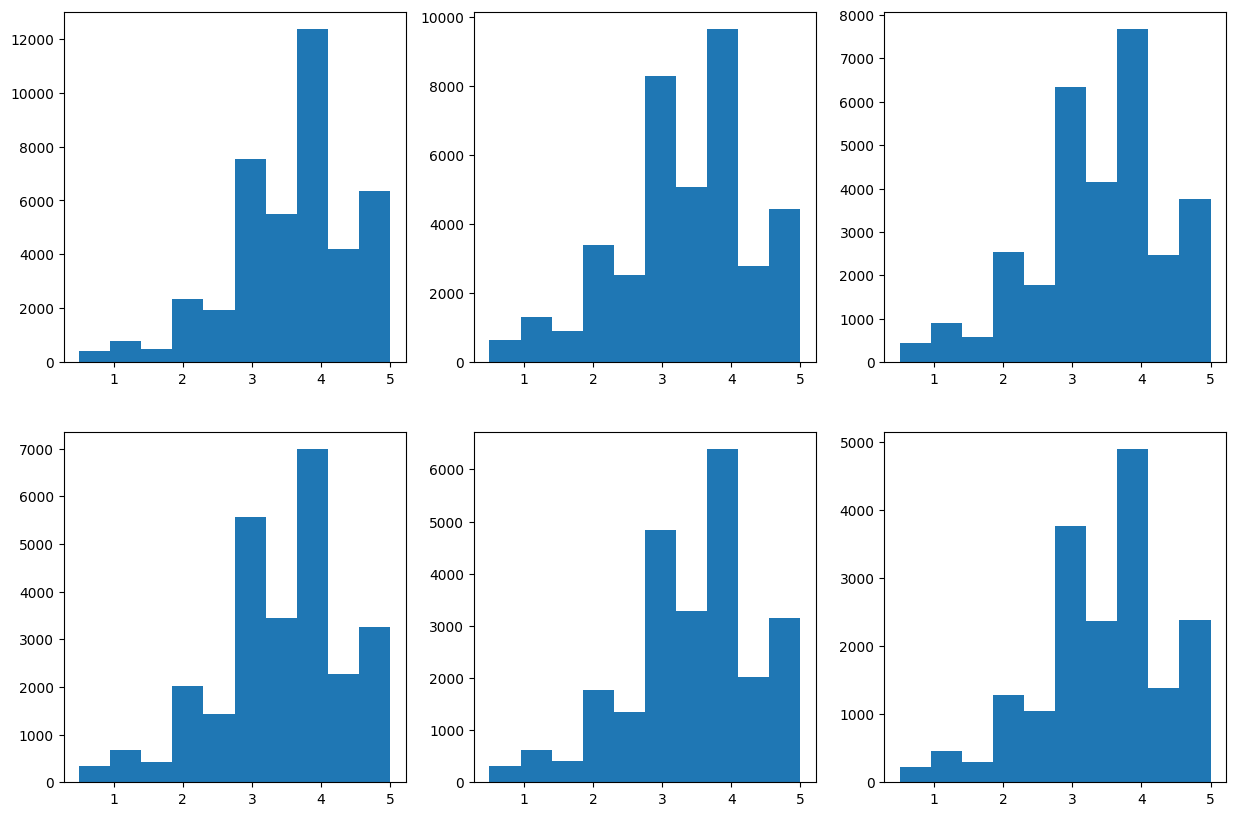

In [183]:
fig, axes = plt.subplots(2,3, figsize=(15,10))

hist0 = movies.loc[movies['Drama'] == 1]['rating']
hist1 = movies.loc[movies['Comedy'] == 1]['rating']
hist2 = movies.loc[movies['Action'] == 1]['rating']
hist3 = movies.loc[movies['Thriller'] == 1]['rating']
hist4 = movies.loc[movies['Adventure'] == 1]['rating']
hist5 = movies.loc[movies['Romance'] == 1]['rating']

axes[0][0].hist(hist0)
axes[0][1].hist(hist1)
axes[0][2].hist(hist2)
axes[1][0].hist(hist3)
axes[1][1].hist(hist4)
axes[1][2].hist(hist5)

In [182]:
for genre in genre_names:
    print(f"Median rating of {genre}: {movies.loc[movies[genre] == 1]['rating'].median()}")

Median rating of Action: 3.5
Median rating of Adventure: 3.5
Median rating of Animation: 4.0
Median rating of Children: 3.5
Median rating of Comedy: 3.5
Median rating of Crime: 4.0
Median rating of Documentary: 4.0
Median rating of Drama: 4.0
Median rating of Fantasy: 3.5
Median rating of Film-Noir: 4.0
Median rating of Horror: 3.5
Median rating of IMAX: 4.0
Median rating of Musical: 3.5
Median rating of Mystery: 4.0
Median rating of Romance: 3.5
Median rating of Sci-Fi: 3.5
Median rating of Thriller: 3.5
Median rating of War: 4.0
Median rating of Western: 4.0
Median rating of (no genres listed): 3.5


# Feature Engineering (`Groupby useId`)

In [98]:
grouped_userId = movies.groupby('userId')

In [ ]:
# grouped_userId.get_group(3).loc[grouped_userId.get_group(3)['Animation'] == 1]['rating'].mean()
grouped_userId.get_group(3)

# Try `surprise` Recommender System

First, this model only takes into account the movie ID and rating, not the genres.

In [47]:
import surprise
from surprise import Reader, Dataset, SVD

In [42]:
reader = Reader()

In [45]:
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader=reader)

In [52]:
train, test = surprise.model_selection.train_test_split(data, random_state=42)

In [53]:
svd = SVD()
# Other models that we can try are
# KNNBasic
# NMF

In [50]:
from surprise.model_selection import cross_validate

In [55]:
# cross_validate(svd, data, measures=['RMSE', 'MAE'])
svd.fit(train)

In [ ]:
svd.test(test)

In [57]:
# Model evaluation
surprise.accuracy.rmse(svd.test(test))

RMSE: 0.8805


0.8805219917997411

### Predicing ratings for all movies from one user (example is user ID 610)

In [78]:
movie_id = list(ratings['movieId'].value_counts().index)

In [84]:
svd.predict(610, 1)[3]

4.4297657694331765

In [85]:
predictions = {}
for movie in movie_id:
    predictions[movie] = svd.predict(610, movie)[3] #610 is the user ID

predictions
# potentially get top 5 movies

{356: 4.069035630426988,
 318: 3.9957474694714064,
 296: 4.485396080190121,
 593: 4.491017509166918,
 2571: 4.790448213523217,
 260: 4.401428076276737,
 480: 4.396286664383741,
 110: 4.369293858812651,
 589: 4.494198861217292,
 527: 4.06639052803883,
 2959: 4.599719349311852,
 1: 4.4297657694331765,
 1196: 4.606459937755864,
 2858: 4.204055299523723,
 50: 4.5784873627365625,
 47: 4.363088717428873,
 780: 3.9222642145881466,
 150: 3.8718213391234477,
 1198: 4.751587318994665,
 4993: 4.612123565704028,
 1210: 4.375273244117065,
 858: 4.6083224629761,
 457: 4.206846305160548,
 592: 4.254253465844852,
 5952: 4.6428630164241556,
 2028: 4.474660247307158,
 7153: 4.584868243692056,
 588: 4.237868631394084,
 608: 4.107036902897018,
 2762: 4.02620378966715,
 380: 3.90150894293211,
 32: 4.2634158002020195,
 364: 4.141633730684464,
 377: 3.691618154818817,
 1270: 4.543492366317329,
 3578: 4.15244718121798,
 4306: 3.966323139702072,
 1580: 3.943348428457668,
 590: 4.008553751520925,
 648: 3.394167